In [33]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
#downloading TCS stock data
stock = yf.download('TCS.BO', start='2010-01-01', end='2025-01-01')
#preview the data
stock.head()                    

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TCS.BO,TCS.BO,TCS.BO,TCS.BO,TCS.BO
Date,,,,,
2010-01-04,235.033722,236.972277,233.876841,234.721052,205618
2010-01-05,234.783615,237.566363,233.282786,236.456390,361778
2010-01-06,229.436951,235.440211,228.248810,235.408952,568174
2010-01-07,223.449356,230.062307,222.308104,229.186836,843042
2010-01-08,219.025070,223.871449,217.805651,218.868735,899818


In [35]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3677 entries, 2010-01-04 to 2024-12-31
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Close, TCS.BO)   3677 non-null   float64
 1   (High, TCS.BO)    3677 non-null   float64
 2   (Low, TCS.BO)     3677 non-null   float64
 3   (Open, TCS.BO)    3677 non-null   float64
 4   (Volume, TCS.BO)  3677 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 172.4 KB


In [36]:
#Displaying basic statistics
stock.describe()

Price,Close,High,Low,Open,Volume
Ticker,TCS.BO,TCS.BO,TCS.BO,TCS.BO,TCS.BO
count,3677.000000,3677.000000,3677.000000,3677.000000,3.677000e+03
mean,1648.486085,1665.238733,1632.339808,1649.343611,2.248072e+05
std,1204.543717,1215.362748,1194.122880,1205.094244,5.065021e+05
min,219.025070,223.871449,217.518692,218.868735,9.598000e+03
25%,707.585510,719.363945,701.271250,707.422707,8.016600e+04
50%,1062.167480,1070.183868,1051.115992,1062.127561,1.303580e+05
75%,2878.527344,2911.770804,2849.544510,2879.417761,2.478220e+05
max,4540.764648,4574.731719,4502.757525,4573.684471,2.558219e+07


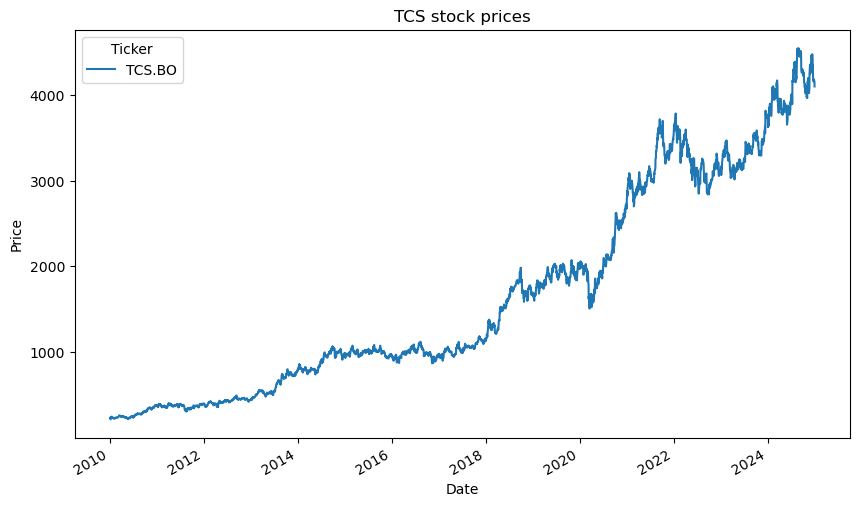

In [37]:
#plotting the closing price 
stock['Close'].plot(figsize=(10, 6), title="TCS stock prices", ylabel="Price")
plt.show()

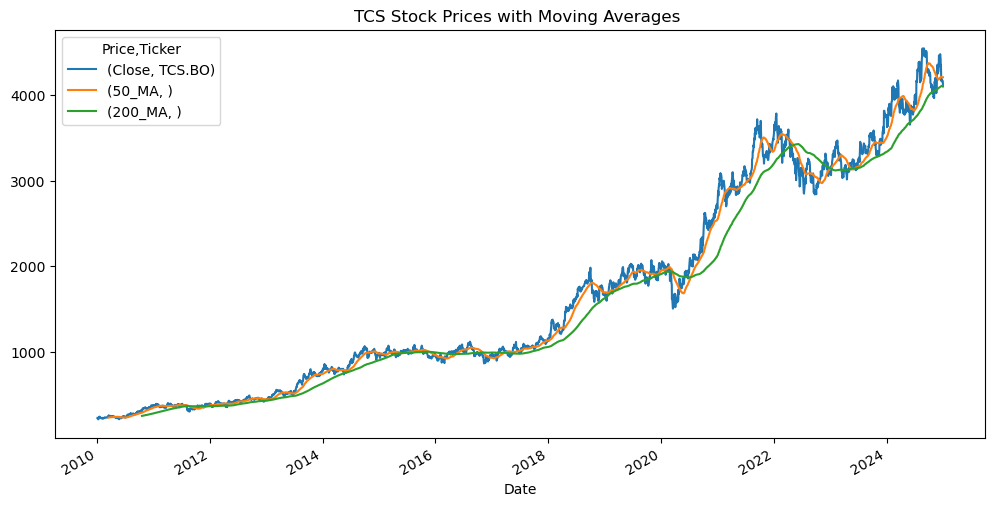

In [38]:
#adding 50 to 200day moving averages to smooth out the data and observe trends
#we need to calculate moving averages
stock['50_MA'] = stock['Close'].rolling(window=50).mean()
stock['200_MA'] = stock['Close'].rolling(window=200).mean()
#plotting clsoing price  with moving averages
stock[['Close', '50_MA', '200_MA']].plot(figsize=(12, 6), title="TCS Stock Prices with Moving Averages ")
plt.show()

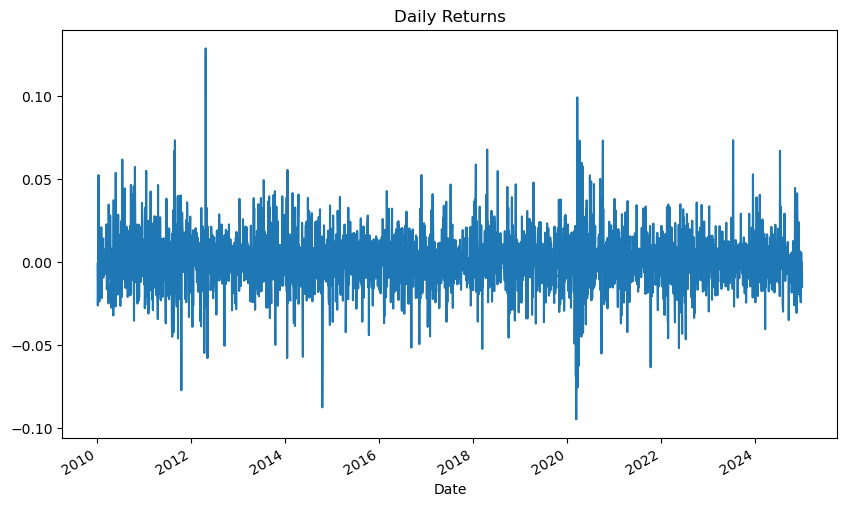

In [39]:
# Calculating daily returns
stock['Daily_Return'] = stock['Close'].pct_change()

# Plot daily returns
stock['Daily_Return'].plot(figsize=(10, 6), title="Daily Returns")
plt.show()


In [40]:
#calculating 7-day rolling standard deviation [volatility]
stock['Volatility'] = stock['Daily_Return'].rolling(window=7).std()
#displaying data with the new column 
stock[['Close', '50_MA', '200_MA', 'Volatility']].head()

Price,Close,50_MA,200_MA,Volatility
Ticker,TCS.BO,,,
Date,,,,
2010-01-04,235.033722,NaN,NaN,NaN
2010-01-05,234.783615,NaN,NaN,NaN
2010-01-06,229.436951,NaN,NaN,NaN
2010-01-07,223.449356,NaN,NaN,NaN
2010-01-08,219.025070,NaN,NaN,NaN


In [41]:
stock.dropna(inplace=True)
print(stock.shape) 


(3478, 9)


In [42]:
#defining the features and target
features = stock[['50_MA','200_MA', 'Volatility']].values
target = stock['Close'].values


In [43]:
from sklearn.model_selection import train_test_split
#splitting data into training and testing sets (80%-20%]
x_train,x_test,y_train,y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [47]:
from sklearn.linear_model import LinearRegression
#Intializing and training the linear Regrresion Model
model = LinearRegression()
model.fit(x_train, y_train)





LinearRegression()

In [49]:
#Predicting stock prices for the test set
predictions = model.predict(x_test)

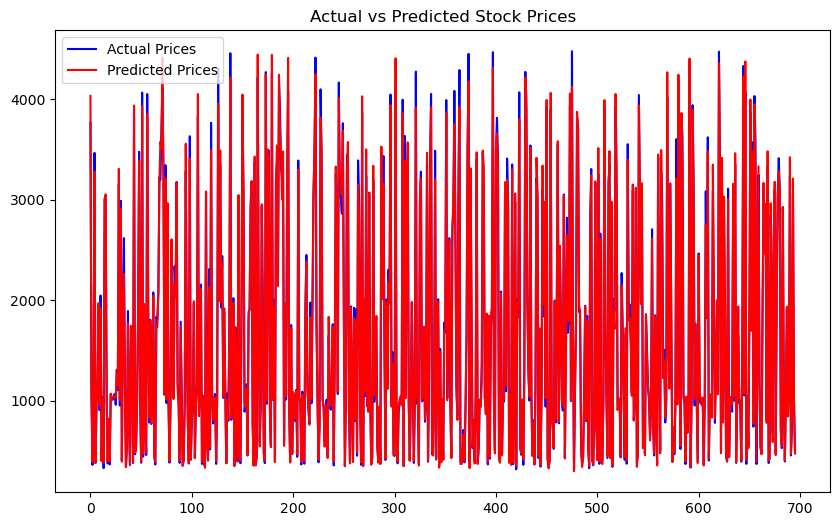

In [50]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_test, label="Actual Prices", color="blue")
plt.plot(predictions, label="Predicted Prices", color="red")
plt.legend()
plt.title("Actual vs Predicted Stock Prices")
plt.show()


In [51]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 9853.41139998583


In [52]:
rmse = mse ** 0.5
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 99.26435110343405
